<a href="https://colab.research.google.com/github/SisekoC/OpenCV/blob/main/Credit_Card_Fraud_Detection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

## Preprocessing the dataset

In [5]:
# check for null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Exploratory Data Analysis

<Axes: ylabel='count'>

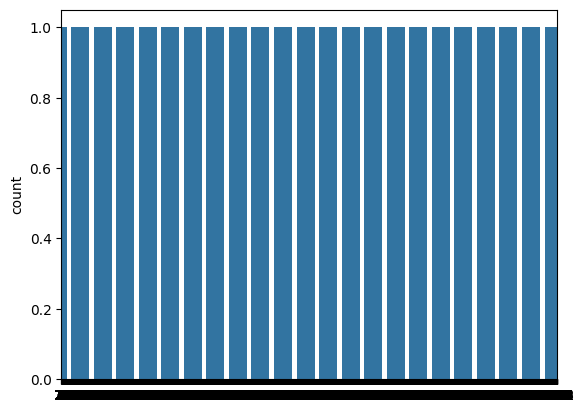

In [6]:
sns.countplot(df['Class'])

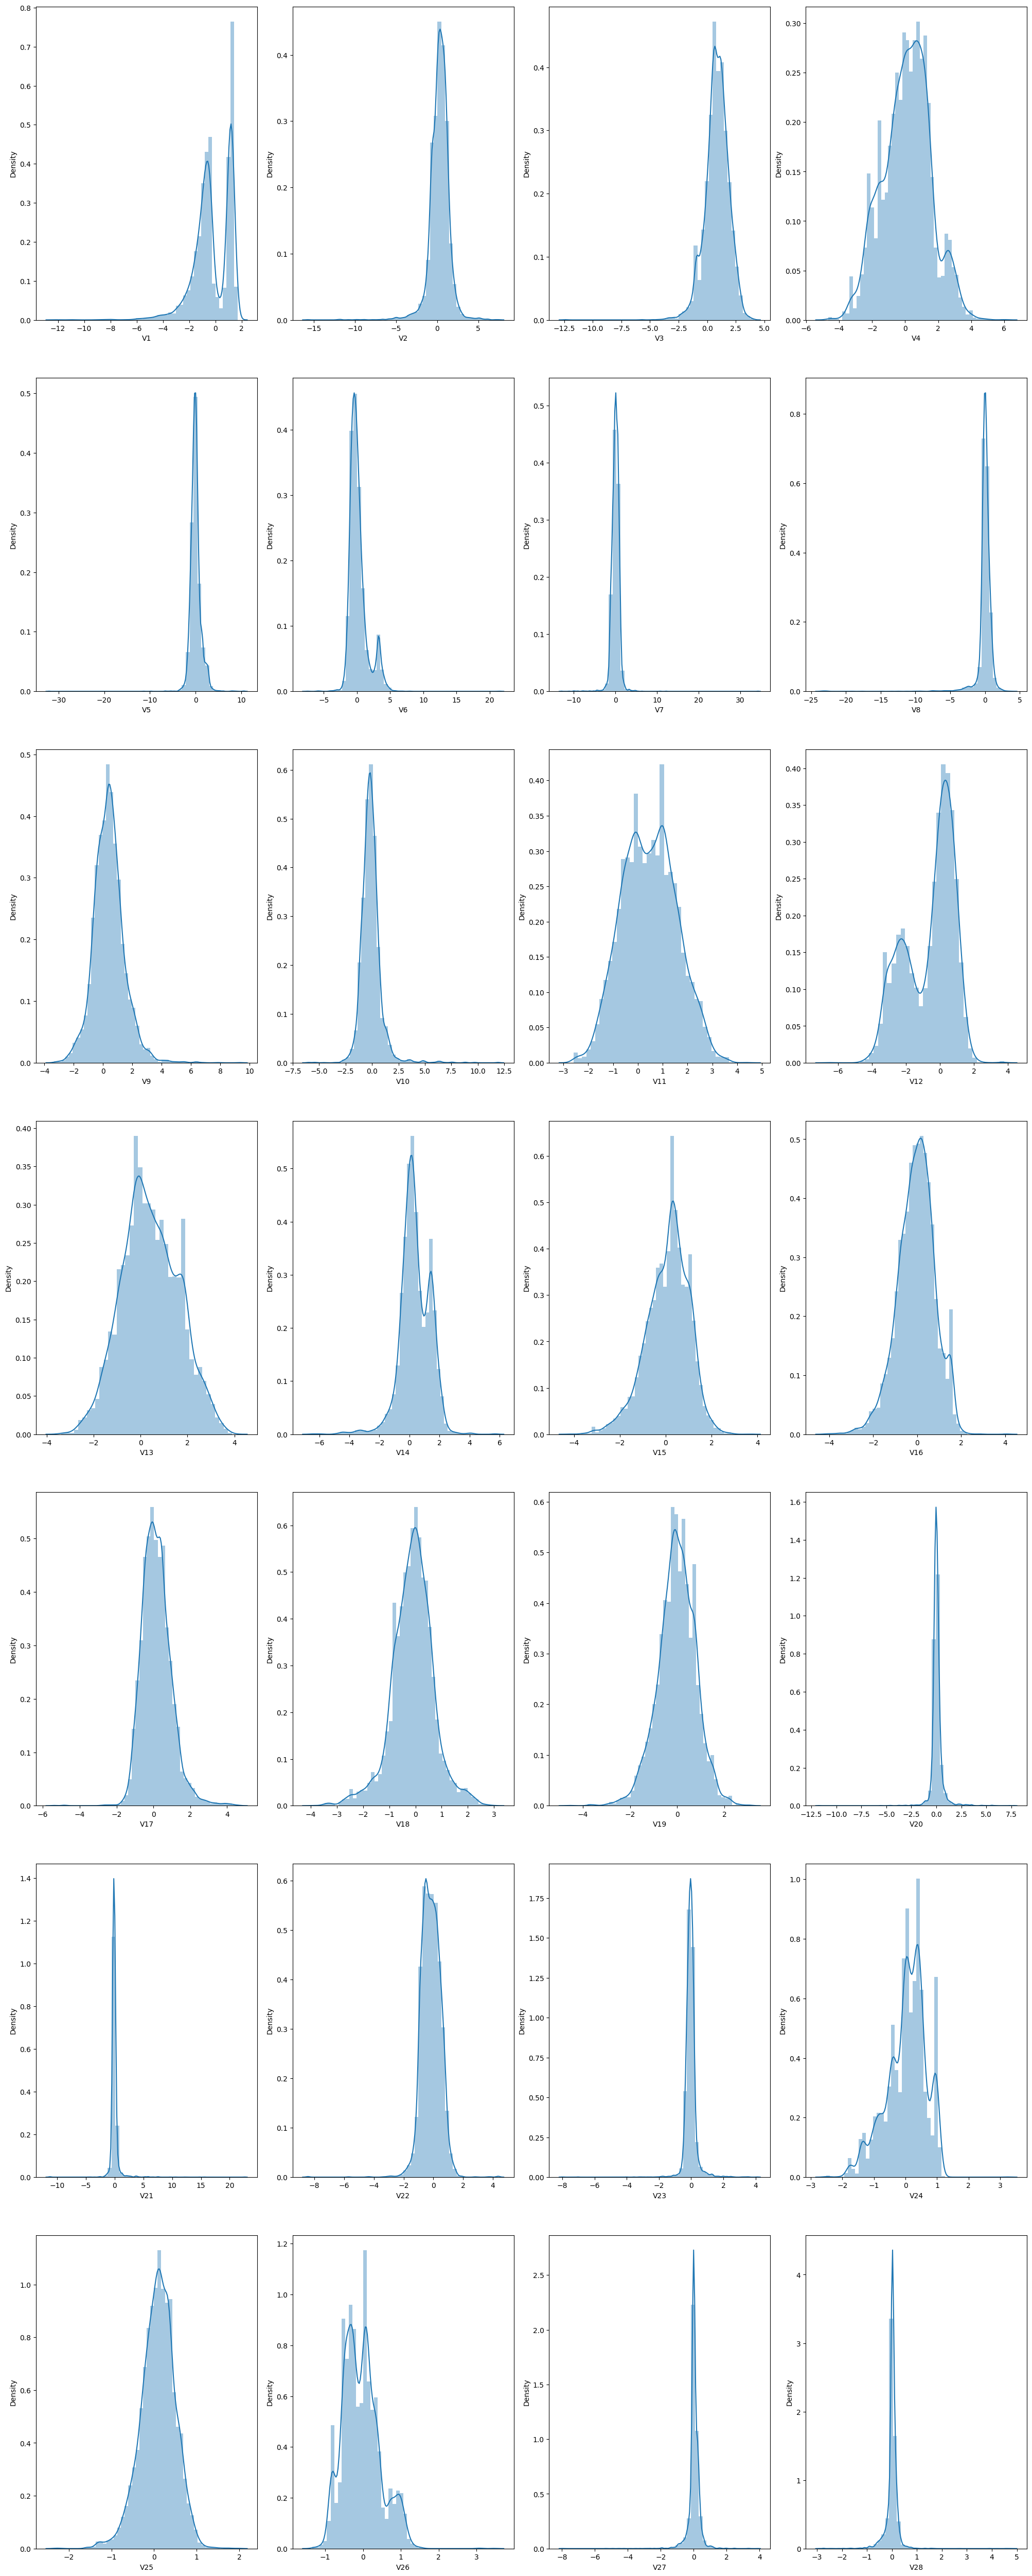

In [7]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Density'>

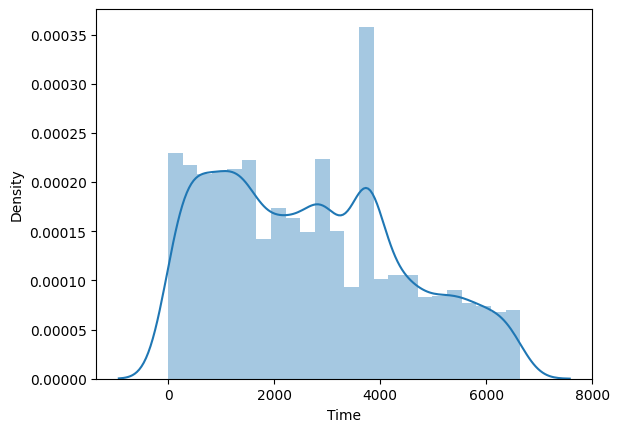

In [8]:
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

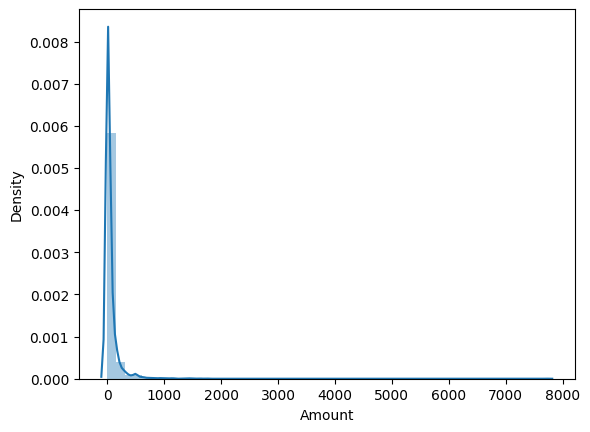

In [9]:
sns.distplot(df['Amount'])

## Coorelation Matrix



<Axes: >

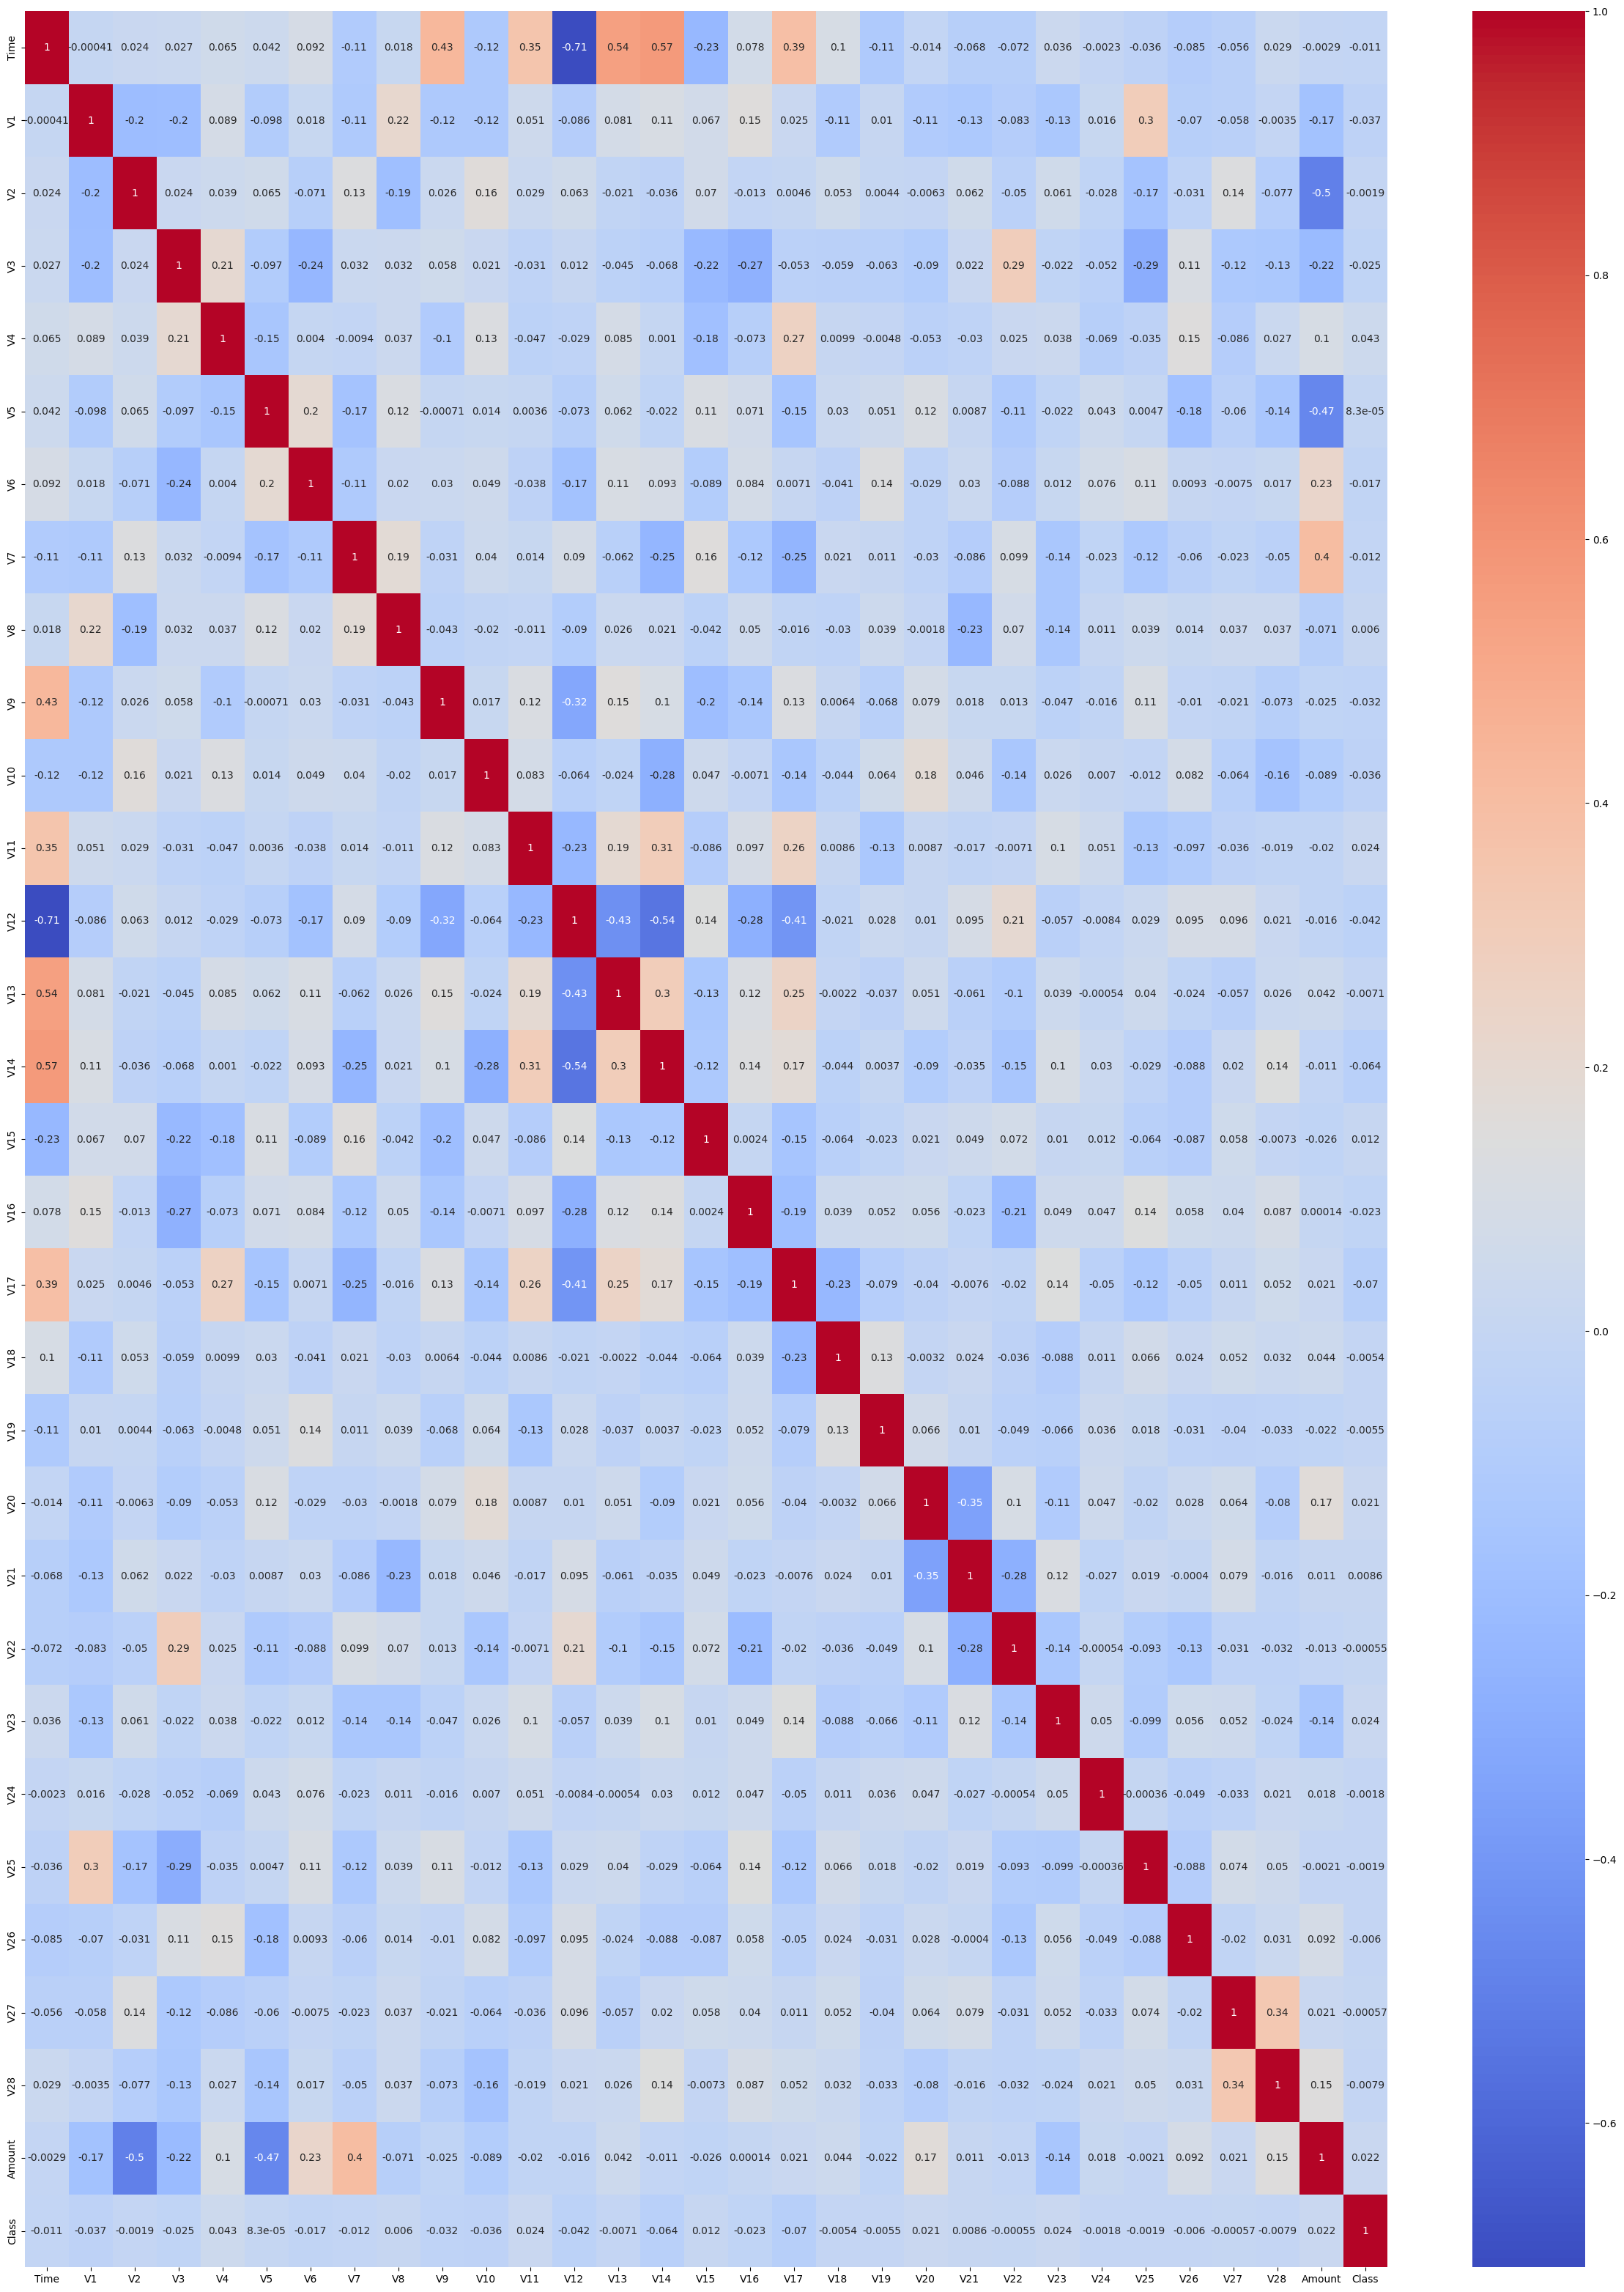

In [10]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [21]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

## Standard Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [23]:
x_scaler[-1]

array([ 2.24796555, -0.19287286, -0.34564471,  1.29519018,  0.63381727,
       -1.26457044,  0.24507108,  0.3791571 ,  0.06476797,  1.09482266,
       -0.93563084,  0.39720903, -0.85760627,  1.4053703 ,  0.50995799,
       -0.31603145, -1.51081097,  1.02734452,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [24]:
# Assuming y is a pandas Series
mask = ~pd.isna(y)
x_scaler = x_scaler[mask]
y = y[mask]

## Model Training

In [25]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1493
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1494
   macro avg       0.50      0.50      0.50      1494
weighted avg       1.00      1.00      1.00      1494

F1 Score: 0.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1493
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1494
   macro avg       0.50      0.50      0.50      1494
weighted avg       1.00      1.00      1.00      1494

F1 Score: 0.0


In [28]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1493
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1494
   macro avg       0.50      0.50      0.50      1494
weighted avg       1.00      1.00      1.00      1494

F1 Score: 0.0


## Class Imbalancement

<Axes: ylabel='count'>

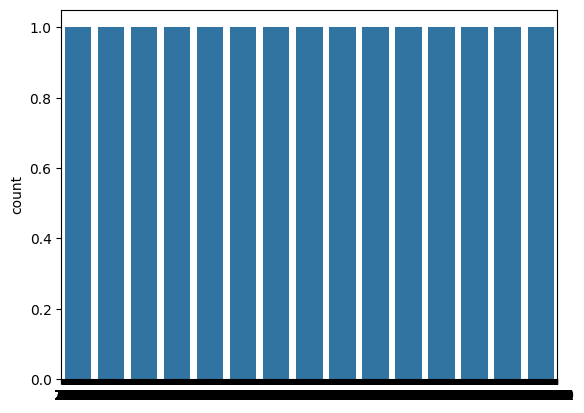

In [29]:
sns.countplot(y_train)

In [32]:
from imblearn.over_sampling import RandomOverSampler

over_sample = RandomOverSampler()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)


<Axes: ylabel='count'>

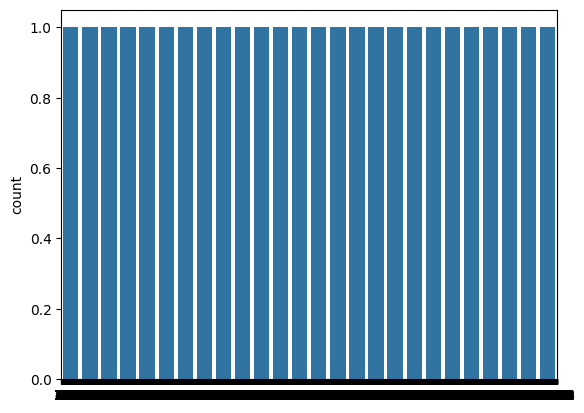

In [33]:
sns.countplot(y_smote)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1493
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1494
   macro avg       0.50      0.50      0.50      1494
weighted avg       1.00      1.00      1.00      1494

F1 Score: 0.0


In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1493
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1494
   macro avg       0.50      0.50      0.50      1494
weighted avg       1.00      1.00      1.00      1494

F1 Score: 0.0


In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1493
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1494
   macro avg       0.50      0.50      0.50      1494
weighted avg       1.00      1.00      1.00      1494

F1 Score: 0.0
